In [ ]:
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows=None)  #renders if the df has more than 5000 rows

In [ ]:
alt.__version__

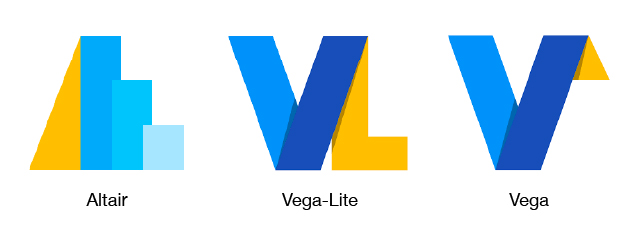

---

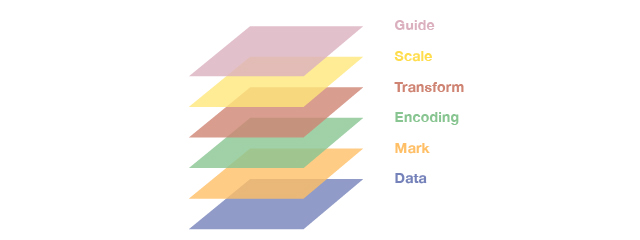

#Data

Tabular Data
- Columns = variables
- Rows = observations

Accepted Formats:
* csv
* json
* url
* data-frame

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/danielefadda/dvdj-2022/main/data/gapminder_tidy.csv')

In [ ]:
df.head()

* fertility = babies per woman
* child_mortality = Child Mortality Rate (‰), under age five

#Mark


marks are the geometrical objects that we are goignt to plot. They can be of different types:
* mark_area () - Filled areas defined by an upper line and a base line.
* mark_bar () - Rectangular bars.
* mark_circle () - Scatterplot with circles.
* mark_line () - Line segments connected.
* mark_point () - Scatterplot with configurable point shapes.
* mark_rect () - Solid rectangles, useful for heatmaps.
* mark_rule () - A vertical or horizontal line spanning the axis..
* mark_square () - Scatterplot with solid squares.
* mark_text () - A scatter plot with points represented by text.
* mark_tick () - A vertical or horizontal tick mark.

# Encoding

The next steps is to create a link between the marks and the data. The encodings are essential concept in altair visual grammar. Encoding is essentialy a mapping between the visual properties of the mark and the data. Each channels can be mapped over a column in the data to define and enconding.

Today we are goign to see this encoding channels:

* **x**: X position of the mark (X axis).
* **y**: Y position of the mark (Y axis).
* **size**: size of the mark. Can be the area or length, depending on the type of mark.
* **color**: color of the mark, can be specified as a CSS color.
* **opacity**: goes from 0 (completely transparent) to 1.
* **shape**: shape of the points for mark_point.
* **order**: determines the order of the line/area points.




Visualize the Charts as Json object

In [ ]:
alt.Chart(df.head(1)).mark_point().to_dict()

# Exercises

## Exercise 1
Create a chart that visualize on the *x* axis the fertility index of all the Nations in 2006 . On mouse hover, visualize the tooltip with the fertility and country values

In [ ]:
df_year=df[df['Year']==2006]
df_year

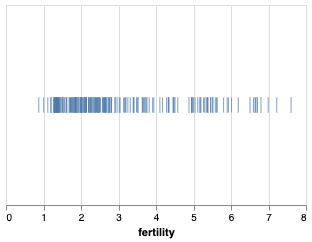

### Solution A

In [ ]:
alt.Chart(df_year).mark_tick().encode(
    x = 'fertility:Q',
    tooltip=['fertility:Q', 'Country:N']
)

### Solution B
using Altair `transform filters`

In [ ]:
from altair import datum

alt.Chart(df_year).mark_tick().encode(
    x = 'fertility:Q',
    tooltip=['fertility:Q', 'Country:N']
).transform_filter(
    datum.Year == 2006
)

## Exercise 2

Create a chart that visualize on the *x* axis the fertility index in 2006  dividing the nation in regions (use the y axis for this dimension)

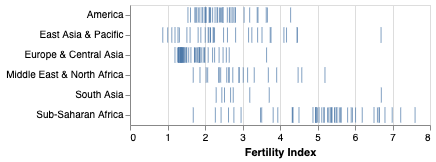

In [ ]:
alt.Chart(df_year).mark_tick().encode(
    x = 'fertility:Q',
    y = 'region:N',
    tooltip=['fertility:Q', 'Country:N']
)

### Exercise 2b
Create a chart that visualize on the *x* axis the fertility index in 2006, dividing the nation in regions.
Compute and visualize for every region the average and plot it over

In [ ]:
base = alt.Chart(df_year).mark_tick().encode(
    x = alt.X('fertility:Q', title='Fertility'),
    y = alt.Y('region:N', title=None),
    tooltip=['fertility:Q', 'Country:N']
)

average = alt.Chart(df_year).mark_tick(color='red', thickness=3, opacity=0.5).encode(
    x = 'mean(fertility):Q',
    y = 'region:N',
    tooltip=['mean(fertility):Q']
)

base + average

## Exercise 3
create a scatterplot that visualizes the fertility index on the *x* axis and the life expectancy on the *y* axis in 2006

In [ ]:
alt.Chart(df_year).mark_point().encode(
    x = alt.X('fertility:Q'),
    y = alt.Y('life:Q')
)

###Esercizio 3B
create a scatterplot that visualizes the fertility index on the *x* axis and the life expectancy on the *y* axis in 2006

Add a regression line

In [ ]:
scatter = alt.Chart(df_year).mark_point().encode(
    x = alt.X('fertility:Q'),
    y = alt.Y('life:Q')
)

scatter + scatter.transform_regression('fertility', 'life').mark_line(color='red')

## Esercizio 4
Create a chart that visualizes the fertility index on the *x* axis and the life expectancy for the *y* axis for the year 2006. Use the mark_point and pair the dimension of each point to the population of each Country. Color the point according to their region.

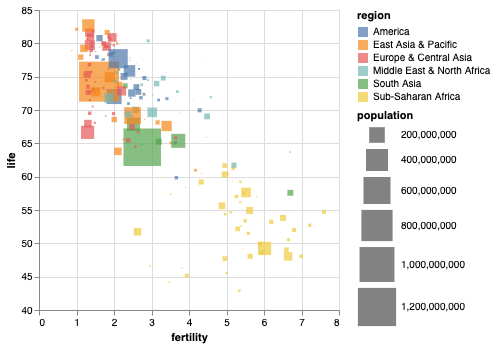

In [ ]:
alt.Chart(df_year).mark_square().encode(
    x = alt.X('fertility:Q'),
    y = alt.Y('life:Q', scale=alt.Scale(domain=(40, 90))),
    size = alt.Size('population:Q', scale=alt.Scale(domain=(df_year['population'].min(), df_year['population'].max()), range=(20, 2000))),
    color = 'region:N',
)

### Order of the marker
In what order are the marks drawn?
Rewrite the dataframe ordering the states from least to most populous

In [ ]:
df_year_or=df_year.sort_values(by='population', ascending=False)
df_year_or.head()

explicitly put opacity = 1 in the previous graph. (Altair automatically adds some opacity to the markers to minimize the cluttering effect).

In [ ]:
alt.Chart(df_year_or).mark_square(opacity=0.8).encode(
    x = alt.X('fertility:Q'),
    y = alt.Y('life:Q', scale=alt.Scale(domain=(40, 90))),
    size = alt.Size('population:Q', scale=alt.Scale(domain=(df_year['population'].min(), df_year['population'].max()), range=(20, 2000))),
    color = 'region:N',
)

---
As we can see from the graphic above, graphic symbols are drawn line by line. In this way, they overlap each other.
Therefore, with this new arragement the more populous graph covers the less populous.
We can sort the data inside Altair, by using the `order=alt.Order('population:Q',sort='descending')` command inside the encode().

In [ ]:
alt.Chart(df_year).mark_square(opacity=0.8).encode(
    x = alt.X('fertility:Q'),
    y = alt.Y('life:Q', scale=alt.Scale(domain=(40, 90))),
    size = alt.Size('population:Q', scale=alt.Scale(domain=(df_year['population'].min(), df_year['population'].max()), range=(20, 2000))),
    color = 'region:N',
    order=alt.Order('population:Q',sort='descending')
)

# Barchart
The mark `bar` is a special type of the mark `rect`.
If no other parameter is specified, `bar` expects a single `field` that defines the height of the bars on the `y`-axis. The width of the bars is computed automatically by Altair. Such a mark is designed to make barcharts very quickly. Let us see one:
show the population for each nation



In [ ]:
alt.Chart(df_year[df_year['region']=='Europe & Central Asia']).mark_bar().encode(
    x=alt.X(field='Country', type='nominal'),
    y=alt.Y(field='population', type='quantitative')
)

##Exercise 5
Highlight the problems in the graph above and propose an alternative

In [ ]:
alt.Chart(df_year[df_year['region']=='Europe & Central Asia']).mark_bar().encode(
    y=alt.Y(field='Country', type='nominal', sort=alt.EncodingSortField(field='population', order='descending')),
    x=alt.X(field='population', type='quantitative'),
)

## Exercise 6
Highlight the problem of the graph below and suggest an alternative (use only the mark `bar`
Specify what cannot be solved optimally.

In [ ]:
alt.Chart(df_year).mark_bar(opacity=0.5).encode(
    x=alt.X('region:N'),
    y=alt.Y('population:Q', stack=False), #default value of stack is True
    color=alt.Color('Country:N',legend=None),
    tooltip=alt.Tooltip('Country:N'),
)

Solution:

In [ ]:
alt.Chart(df_year).mark_bar(opacity=0.5).encode(
    y=alt.Y('region:N', sort=alt.EncodingSortField(field='population', order='descending')),
    x=alt.X('population:Q', stack=True), #default value of stack is True
    color=alt.Color('Country:N'),
    tooltip=alt.Tooltip('Country:N'),
)

The problem is that the question the plot wants to answer is not well posed

#Basic Transformation:

##Exercise 7a
Visualize the total population for every region for the year 2006

###Solution 1 : using pandas

In [ ]:
population_by_region = df_year.groupby(by='region')['population'].sum().reset_index()

In [ ]:
alt.Chart(population_by_region).mark_bar().encode(
    y=alt.Y(field='region', type='nominal', sort=alt.EncodingSortField(field='population', order='descending')),
    x=alt.X(field='population', type='quantitative'),
)

###Solution 2: using Altair

In [ ]:
alt.Chart(df).mark_bar().encode(
    y=alt.Y('region:N', sort='-x', title=None),
    x=alt.X(field='population', aggregate = 'sum', type='quantitative'),
).transform_filter(
    alt.datum.Year == 2006
)

###Solution 3: using altair (Piechart, strongly not recommended)

In [ ]:
alt.Chart(df).mark_arc().encode(
    theta = alt.Theta('population:Q', aggregate='sum'),
    color = alt.Color('region:N'),
    tooltip=[alt.Tooltip('region:N'), alt.Tooltip('population:Q', aggregate='sum')]
).transform_filter(
    alt.datum.Year == 2006
)

## Exercise 7b
Visualize the distribution of life expectancy in the year 2006

In [ ]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('life:Q', bin=True),
    y = alt.Y('count()', title='Count for the year 2006')
).transform_filter(
    alt.datum.Year == 2006
)

In [ ]:
df_year.info()

Same data, but with a red Kernel Density Estimation line

In [ ]:
bar = alt.Chart(df).mark_bar().encode(
    x = alt.X('life:Q', bin=True),
    y = alt.Y('count()', title='Count for the year 2006')
).transform_filter(
    alt.datum.Year == 2006
)

density_line = alt.Chart(df).transform_filter(
    alt.datum.Year == 2006
).transform_density(
    'life',
    as_ = ['life', 'density']
).mark_line(color = 'red').encode(
    x = alt.X('life:Q'),
    y = alt.Y('density:Q')
)

(bar + density_line).resolve_scale(y='independent')

## Exercise 8
Create a graph where on the `y` axis you have regions and on the `x` axis you have bars indicating the minimum and maximum life expectancy.

Add a vertical line on the bars to indicate the average lifespan for each region.

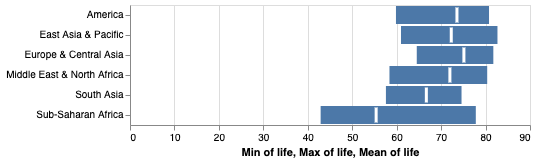

In [ ]:
bar = alt.Chart(df_year).mark_rect(stroke = 'white', strokeWidth = 2).encode(
    alt.X("min(life):Q"),
    alt.X2("max(life):Q"),
    alt.Y("region:N", title=None),
)

avg = alt.Chart(df_year).mark_tick(color="white").encode(
    alt.X("mean(life):Q"),
    alt.Y("region:N"),
)

(bar + avg).configure_tick(thickness=3).properties(width = 400)

##Esercizio 9
Create a time series on fertility trends for the *Europe & Central Asia* region. Highilight the Italian line

Please Note: To create lines based on the Country attribute without associating it with a specific visual encoder, you can use `detail='Country:N'`


In [ ]:
base = alt.Chart(df).transform_filter(alt.datum.region == 'Europe & Central Asia').mark_line(color = 'gray', opacity = 0.4).encode(
    x='Year:O',
    y='fertility:Q',
    detail='Country:N'
)

italy = alt.Chart(df).transform_filter(alt.datum.Country == 'Italy').mark_line(color = 'blue').encode(
    x='Year:O',
    y='fertility:Q'
)

base + italy

## Remaining exercises

#Interactivity and Selection

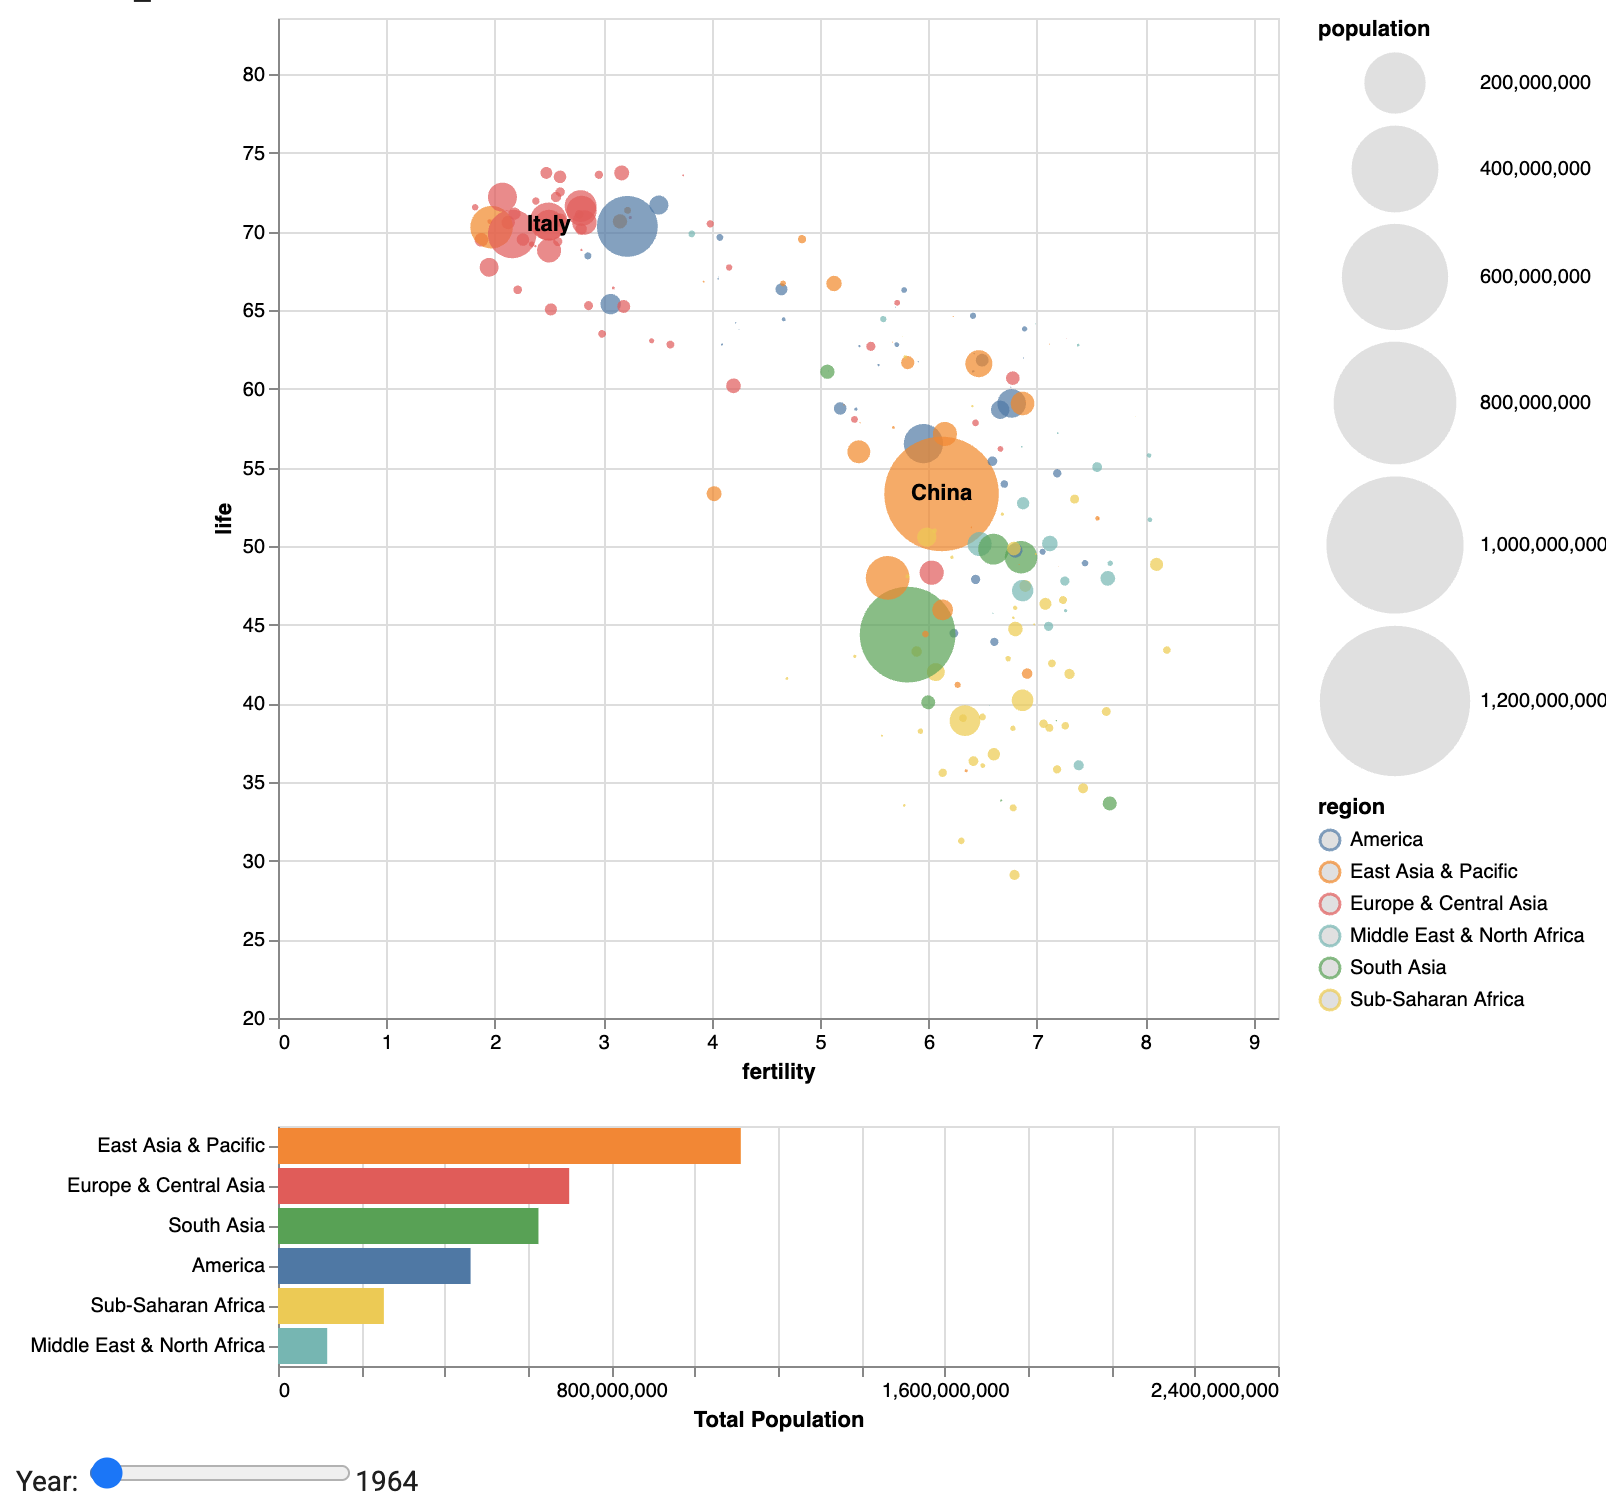

##Esercizio 10a
Create a bubble chart that visualizes on the x-axis the fertility rate and on the y-axis life's expectancy. The size of the bubbles should be related to the population. Visualize the year 2006. The Chart has to be 500px*500px

##Exercise 10b
Reproduce the graph above through the small multiples technique (one scatterplot for each *region*)

##Exercise 11
Add a slider to the graph above(10a), so that the user can choose the year

##Esercizio 12
Add an horizontal-bar histogram to the 10a an use it as a selector to let the user decide which region to see in the scatterplot.


##Esercizio 13
Combine the functions of the charts created in ex 11 and 12. Add a text that highlights the position of China and Italy.

##OpenLab *selections*